In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os,re
from decisions import dyn_prog, prob_matrixer,panel_plot
from model import Population
from scipy.stats import norm
from tqdm import tqdm

# Figure 1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
<ipython-input-9-e6673128f229>:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


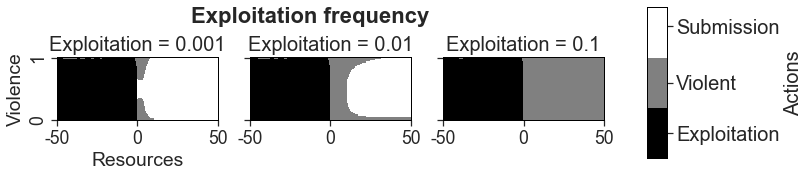

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def panel_plot(name,column,col_min = None,col_max = None):
    def cmap_discretize(cmap, N):
        #Return a discrete colormap from the continuous colormap cmap.
        if type(cmap) == str:
            cmap = plt.get_cmap(cmap)
        colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
        colors_rgba = cmap(colors_i)
        indices = np.linspace(0, 1., N+1)
        cdict = {}
        for ki,key in enumerate(('red','green','blue')):
            cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in range(N+1) ]
        # Return colormap object.
        return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

    cmap = sns.cubehelix_palette(n_colors=3,start=0, rot=.8, light=0.9, as_cmap=True)
    cmap = cmap_discretize(plt.cm.get_cmap('gray', 3),3)

    Results = np.load("/Users/benoit2c/model/Results/"+name,allow_pickle=True)
    Results = pd.DataFrame(Results).loc[::-1]
    Results.set_axis(["Violence","Exploitation","Resources","Actions",column],axis=1,inplace=True)
    if col_min is not None:
        Results = Results.loc[Results.loc[:,column]>=col_min,:]
    if col_max is not None:
        Results = Results.loc[Results.loc[:,column]<=col_max,:]
    Results.Actions= Results.Actions.astype("int8")
    Results.Actions = 2 - Results.Actions
    Results.Violence= Results.Violence.astype("float")
    Results.Violence = Results.Violence.round(2)
    Results.Resources= Results.Resources.astype("float")

    def draw_heatmap(*args, **kwargs):
        data = kwargs.pop('data')
        d = data.pivot(index=args[1], columns=args[0], values=args[2])
        sns.heatmap(d,**kwargs)

    sns.set_theme(font_scale=1.6,style="ticks")
    if len(Results.loc[:,column].unique())==1:
        fg = sns.FacetGrid(Results,col="Exploitation",sharex=True,sharey=True,margin_titles=True,aspect=1,despine=True,legend_out=True)
    else:
        fg = sns.FacetGrid(Results,row="Exploitation",col=column,sharex=True,sharey=True,margin_titles=True,aspect=1,despine=True,legend_out=True)
    cbar_ax = fg.fig.add_axes([1.02, .15, .03, .7])
    cbar_ax.spines["top"].set(visible=True, lw=.8, edgecolor="black")

    fg.map_dataframe(draw_heatmap,"Resources","Violence","Actions",cmap=cmap,xticklabels=500,yticklabels=49,cbar_ax=cbar_ax, cbar_kws={'ticks':[0.33,1,1.75]},vmin=0,vmax=2)
    fg.set_xticklabels([-50,0,50])
    fg.set_yticklabels([0,1])


    for ax in fg.axes.ravel():
        ax.invert_yaxis()

    cbar_ax.set_yticklabels(["Exploitation",'Violent','Submission'],size=20)
    cbar_ax.set_ylabel(ylabel="Actions",size=20)
    cbar_ax.set_ylim((0,2))

    #cbar_ax.spines["outline"].set(visible=True, lw=.8, edgecolor="black")

    fg.set_titles(size=20)
    plt.suptitle("Exploitation frequency",y=.85,fontweight='bold',size=22)
    for ax in fg.axes.flatten(): # Loop directly on the flattened axes 
        for _, spine in ax.spines.items():
            spine.set_visible(True) # You have to first turn them on
            spine.set_color('black')
            spine.set_linewidth(1)
    for spine in cbar_ax.spines.values(): # Loop directly on the flattened axes 
        spine.set_visible(True) # You have to first turn them on
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2)
    cbar_ax.set_frame_on(True)
    fg.axes[0,1].set_xlabel('')
    fg.axes[0,2].set_xlabel('')
    fg.savefig(f"Figures/Fig1.png",dpi=300)

a = panel_plot("decisions_simple.npy","")

# Figure 2

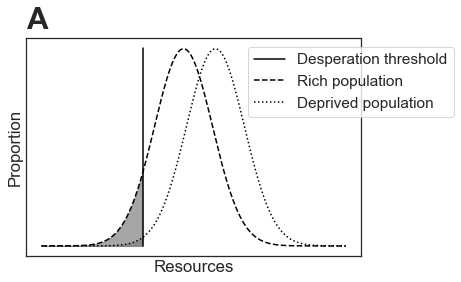

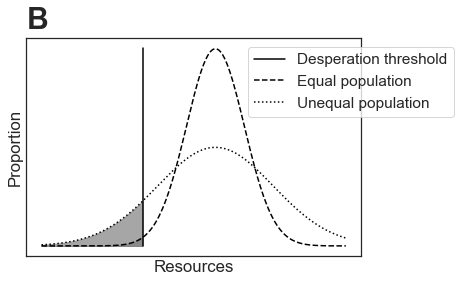

In [10]:
sns.set_theme(font_scale=1.4,style="ticks")
X = np.linspace(-3.5,7,300)
Y = [stats.norm.pdf(x,loc=1.4) for x in X]
plt.plot([0,0],[0,.4],label="Desperation threshold",color="black")
plt.plot(X,[stats.norm.pdf(x,loc=1.4) for x in X],"--",label="Rich population",color="black")
plt.fill_between(X[X<0],[stats.norm.pdf(x,loc=1.4) for x in X if x<0],alpha=.7,color="gray")

plt.plot(X,[stats.norm.pdf(x,loc=2.5,scale=1) for x in X],":",label="Deprived population",color="black")
plt.fill_between(X[X<0],[stats.norm.pdf(x,loc=2.5,scale=1) for x in X if x<0],alpha=.7,color="gray")
plt.ylabel("Proportion")
plt.xlabel("Resources")
plt.text(-4,max(Y)*1.1,"A",fontsize=30, fontweight="bold")
plt.yticks([])
plt.xticks([])
plt.legend(loc="right",bbox_to_anchor=(1.3,.8))
plt.savefig("Figures/Fig2(a).jpg",dpi=300,bbox_inches="tight")
plt.show()
plt.clf()

plt.plot([0,0],[0,.4],label="Desperation threshold",color="black")
Y = [stats.norm.pdf(x,loc=2.5) for x in X]
plt.plot(X,[stats.norm.pdf(x,loc=2.5) for x in X],"--",label="Equal population",color="black")
plt.fill_between(X[X<0],[stats.norm.pdf(x,loc=2.5) for x in X if x<0],alpha=.7,color="gray")



plt.plot(X,[stats.norm.pdf(x,loc=2.5,scale=2) for x in X],":",label="Unequal population",color="black")
plt.fill_between(X[X<0],[stats.norm.pdf(x,loc=2.5,scale=2) for x in X if x<0],alpha=.7,color="gray")
plt.ylabel("Proportion")
plt.xlabel("Resources")
plt.text(-4,max(Y)*1.1,"B",fontsize=30, fontweight="bold")
plt.yticks([])
plt.xticks([])
plt.legend(loc="right",bbox_to_anchor=(1.3,.8))
plt.savefig("Figures/Fig2(b).jpg",dpi=300,bbox_inches="tight")

# Figure 3

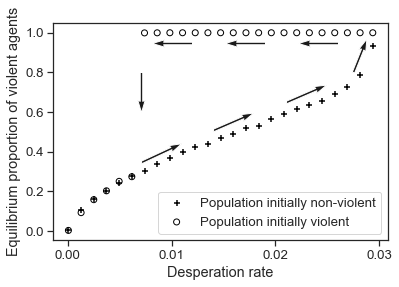

In [8]:
sns.set_theme(font_scale=1.2,style="ticks")

min_ = .00005
max_ = .03
def desp_rate(sigma,mu=15):
    return norm.cdf(0,loc=mu,scale=sigma)
MU = np.linspace(3.5,10,10000)
desp_rates = [desp_rate(sigma=mu) for mu in MU]
desp = np.linspace(min_,max_,50)
MU = [MU[np.argmin(np.abs(x-desp_rates))] for x in desp]
n = 50
results = [np.load(f"Results/result2_sigma={np.round(sigma,2)}_n={n}_v=0.npy") for sigma in MU]
results2 = [np.load(f"Results/result2_sigma={np.round(sigma,2)}_n={n}_v=1.npy") for sigma in MU]


plt.quiver(.007,.35,3,1.4,scale=25,linewidth = 1)
plt.quiver(.014,.51,3,1.3,scale=25,linewidth = 1)
plt.quiver(.021,.65,3,1.3,scale=25,linewidth = 1)
plt.quiver(.0275,.8,1,2.5,scale=25,linewidth = 1)
plt.quiver(.012,.95,-3,0,scale=25,linewidth = 1)
plt.quiver(.019,.95,-3,0,scale=25,linewidth = 1)
plt.quiver(.026,.95,-3,0,scale=25,linewidth = 1)
plt.quiver(.007,.8,0,-3,scale=25,linewidth = 1)

V = [1-result[0,-1] for result in results]
plt.scatter(desp[::2],V[::2],marker="+",color="black",label="Population initially non-violent")
V = [1-result[0,-1] for result in results2]
plt.scatter(desp[::2],V[::2],marker="o",color="none",edgecolors="black",label="Population initially violent")
#plt.xlim((.6*min(desp),1.03*desp[np.min(np.where(np.array(V)>.97))]))
plt.xticks([0,.01,.02,.03])

plt.legend()
plt.xlabel("Desperation rate")
plt.ylabel("Equilibrium proportion of violent agents")
plt.savefig("Figures/Fig3.png",dpi=300,bbox_inches="tight")

# Figure 4a

In [4]:
min_ = .00005
max_ = .03
def desp_rate(sigma,mu=15):
    return norm.cdf(0,loc=mu,scale=sigma)
MU = np.linspace(3.5,10,10000)
desp_rates = [desp_rate(sigma=mu) for mu in MU]
desp = np.linspace(min_,max_,50)
MU = [MU[np.argmin(np.abs(x-desp_rates))] for x in desp[::2]]
V = np.linspace(0,1,15)
n = 50
P = []
D_v = []
D_p = []
for i in tqdm(range(len(MU))):
    D_v.append([])
    D_p.append([])
    P.append([])
    for v in V:
        Pop = Population(μ=15,m=.2,σ = MU[i],n = n,initial_v=v,N = 100000)
        P[i].append(np.mean(Pop.strategies==2))
        Pop.update_strategies()
        D_p[i].append(np.mean(Pop.strategies==2) - Pop.p)
        D_v[i].append(np.mean(Pop.strategies>0) - v)

100%|██████████| 25/25 [13:23<00:00, 32.14s/it]


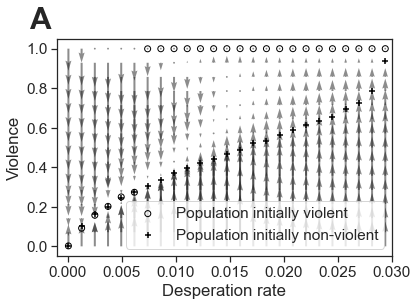

In [11]:
sns.set_theme(font_scale=1.4,style="ticks")

V = np.linspace(0,1,15)
for i in range(25):
    plt.quiver([np.mean(desp[::2][i]) for z in range(15)],V,np.array(D_p[i]),np.sign(D_v[i])*(np.abs(D_v[i])).clip(-.4,.4),width=.006,alpha=.5)

min_ = .00005
max_ = .03
def desp_rate(sigma,mu=15):
    return norm.cdf(0,loc=mu,scale=sigma)
MU = np.linspace(3.5,10,10000)
desp_rates = [desp_rate(sigma=mu) for mu in MU]
desp = np.linspace(min_,max_,50)
MU = [MU[np.argmin(np.abs(x-desp_rates))] for x in desp]
n = 50
results = [np.load(f"Results/result2_sigma={np.round(sigma,2)}_n={n}_v=0.npy") for sigma in MU]
results2 = [np.load(f"Results/result2_sigma={np.round(sigma,2)}_n={n}_v=1.npy") for sigma in MU]


V = [1-result[0,-1] for result in results2]
plt.scatter(desp[::2],V[::2],marker="o",color="none",edgecolors="black",label="Population initially violent")
V = [1-result[0,-1] for result in results]
plt.scatter(desp[::2],V[::2],marker="+",color="black",label="Population initially non-violent")
plt.xlim((min(desp),1.03*desp[np.min(np.where(np.array(V)>.97))]))
plt.xlim((-.001,.03))
plt.ylabel("Violence")
plt.xlabel("Desperation rate")

plt.legend(loc="lower right")
plt.text(-.0035,1.1, "A",fontsize=30,fontweight='bold')
plt.savefig("Figures/fig4a.png",bbox_inches="tight",dpi=300)

# Figure 4b

100%|██████████| 50/50 [00:31<00:00,  1.58it/s]


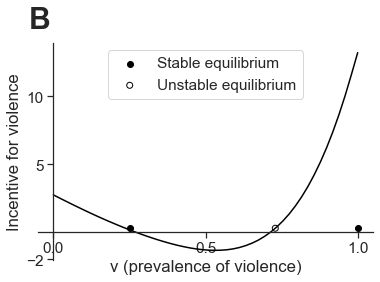

In [7]:
sns.set_theme(font_scale=1.4,style="ticks")
p_m = prob_matrixer()
V = np.linspace(0,1)
diff = []
for v in tqdm(V):
    a = dyn_prog(p=.002,v=v,prob_matrixes=p_m,n=5)
    diff.append(a[1][1][600:].mean()-a[1][0][600:].mean())
diff = np.array(diff)

fig, ax = plt.subplots()
ax.plot(V,np.array(diff)*1000,color="black")
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
ax.set_xticks([0,.5,1])
ax.set_yticks([-2,5,10])
plt.xlabel("v (prevalence of violence)")
plt.ylabel("Incentive for violence")
z = np.where(np.abs(np.array(diff))<.0001)
ax.scatter(V[z][0]-.015,.3,color="black",label="Stable equilibrium")
ax.scatter(V[z][1]+.015,.3,color="black", facecolors='none', edgecolors='black',label="Unstable equilibrium")
ax.scatter(1,.3,color="black")
plt.text(-.08,15, "B",fontsize=30,fontweight='bold')
plt.legend(loc="upper center")
plt.savefig("Figures/Fig4(b).png",bbox_inches="tight",dpi=300)